#Used Cars Selling Price Prediction

#Import Libraries

In [1]:
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score

#Data Preprocessing and Exploration

In [2]:
def preprocess_data(data):

    # Display the column names of the DataFrame
    data.columns

    # Print the first few rows of the DataFrame
    print(data.head())

    # Check if there are any missing values in the DataFrame
    data.isnull().any()

    # Drop rows with missing values (NaN)
    data = data.dropna()

    # Check if there are any missing values after dropping NaN
    data.isnull().any()

    # Display descriptive statistics of the DataFrame
    data.describe()

    # Print data types of each column in the DataFrame
    data.info()

    # Create and display a histogram of the 'Selling_Price' column
    sns.distplot(data['Selling_Price'], bins=30)

    # Create and display histograms for all int and float type features in the DataFrame
    data.hist(bins=25, figsize=(30, 30))

    # Create and display a bar plot of the counts of different 'Fuel_Type'
    data.Fuel_Type.value_counts().plot(kind='bar')

    # Create and display a bar plot of the counts of different 'Transmission' values
    data.Transmission.value_counts().plot(kind='bar')

    # Create and display a bar plot of the counts of different 'Owner' values
    data.Owner.value_counts().plot(kind='bar')

    # Subtract 2024 from 'Year' column in the DataFrame
    data['Year'] =  2024 - data['Year']
    data.rename(columns={'Year': 'Age'}, inplace=True)
    # Update the 'Year' value in the inputs list
    #inputs[0] = 'Age'

    cat_cols = [ 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner','Car_Name']
    inputs = [ 'Age', 'Present_Price' , 'Fuel_Type' , 'Seller_Type' , 'Transmission' , 'Owner' , 'Car_Name' ]
    output = ['Selling_Price']


    print('inputs',inputs)
    # Categorical data conversion

    for i in cat_cols:
            data[i] = data[i].astype('category').cat.codes

    # Handle dummy variables
    data = pd.get_dummies(data, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)


    # Now, inputs should include the new dummy variables
    inputs = ['Age', 'Present_Price', 'Fuel_Type_1', 'Fuel_Type_2', 'Seller_Type_1', 'Transmission_1', 'Owner', 'Car_Name']

    # Display the correlation matrix
    correlation_matrix = data.corr()
    print("Correlation Matrix:")
    print(correlation_matrix)

    # Plotting the heatmap of the correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()
    # Print some examples of the new Table

    print(data.head())

    data.hist(bins=25, figsize=(20, 20))

    X = data[inputs]
    y = data[output]

    # Create a scatterplot, with the feature on the x-axis and the target variable on the y-axis
    for feature in inputs:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=data[feature], y=data[output].values.flatten())
        plt.title(f'Scatterplot of {feature} vs {output[0]}')
        plt.xlabel(feature)
        plt.ylabel(output[0])
        plt.show()


    return X,y

# Split and Scale data

In [3]:
def split_and_scale(X, y, test_size=0.25, random_state=21):

    # Split data in train and test set



    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=21)
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

    # Initialize the scaler
    scaler = StandardScaler()

    # Fit and transform the scaler on the training data
    X_train_scaled = scaler.fit_transform(X_train)

    # Transform the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Print the shapes of the normalized data
    print("X_train_scaled shape:", X_train_scaled.shape)
    print("X_test_scaled shape:", X_test_scaled.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)

    return X_train_scaled, X_test_scaled, y_train, y_test

# Apply Linear Regression with StatsModel library and get stats after the training

In [4]:
def apply_linear_regression_with_sm(X_train, y_train):
    # Add a constant term to the features matrix
    X_train_with_const = sm.add_constant(X_train)

    # Create and fit the OLS (Ordinary Least Squares) model
    model = sm.OLS(y_train, X_train)
    results = model.fit()

    # Display the summary
    print(results.summary())

# Linear Regression

In [5]:
def apply_linear_regression_with_sklearn(X_train, y_train, X_test, y_test):



    linregressor = LinearRegression()

    # Train the Model

    linregressor.fit(X_train, y_train)

    print('Coefficients:',linregressor.coef_)
    print('Intercept:',linregressor.intercept_)

    print(linregressor.intercept_)
    print(linregressor.coef_)

    y_pred_test = linregressor.predict(X_test)

    # Calculate metrics
    mae = metrics.mean_absolute_error(y_test, y_pred_test)
    mse = metrics.mean_squared_error(y_test, y_pred_test)
    r2 = metrics.r2_score(y_test, y_pred_test)
    evs = metrics.explained_variance_score(y_test, y_pred_test)

    return mae, mse, r2, evs



# Random Forest Regressor

In [6]:
def apply_linear_regression_with_RandomForestRegressor(X_train, y_train, X_test, y_test):

    rfr = RandomForestRegressor(n_estimators=250)
    rfr.fit(X_train, y_train)
    y_pred = rfr.predict(X_test)

    y_pred_test = rfr.predict(X_test)

    # Calculate metrics
    mae = metrics.mean_absolute_error(y_test, y_pred_test)
    mse = metrics.mean_squared_error(y_test, y_pred_test)
    r2 = metrics.r2_score(y_test, y_pred_test)
    evs = metrics.explained_variance_score(y_test, y_pred_test)

    return mae, mse, r2, evs


# Apply PCA

In [7]:
def apply_pca(X_train, X_test, n_components=3):
    # Apply PCA
    pca = PCA(n_components=n_components)

    # Fit and transform on training data
    X_train_pca = pca.fit_transform(X_train)

    # Transform the test data using the same PCA
    X_test_pca = pca.transform(X_test)

    # Print the shapes after PCA
    print(f"X_train_pca shape: {X_train_pca.shape}")
    print(f"X_test_pca shape: {X_test_pca.shape}")

    return X_train_pca, X_test_pca

# Run functions, get graphs and results.Run the models for components from 1-8 using pca and compare the results

(301, 9)
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price

<ipython-input-2-742ce15f8e3d>:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Selling_Price'], bins=30)


inputs ['Age', 'Present_Price', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Car_Name']
Correlation Matrix:
                Car_Name       Age  Selling_Price  Present_Price  Kms_Driven  \
Car_Name        1.000000 -0.017265       0.499198       0.475539    0.064453   
Age            -0.017265  1.000000      -0.236141       0.047584    0.524342   
Selling_Price   0.499198 -0.236141       1.000000       0.878983    0.029187   
Present_Price   0.475539  0.047584       0.878983       1.000000    0.203647   
Kms_Driven      0.064453  0.524342       0.029187       0.203647    1.000000   
Owner          -0.097531  0.171232      -0.096487      -0.019838    0.061766   
Fuel_Type_1     0.353642 -0.064315       0.552339       0.473306    0.172515   
Fuel_Type_2    -0.369890  0.059959      -0.540571      -0.465244   -0.172874   
Seller_Type_1  -0.829718  0.039896      -0.550724      -0.512030   -0.101419   
Transmission_1 -0.059855 -0.000394      -0.367128      -0.348715   -0.162510   

  

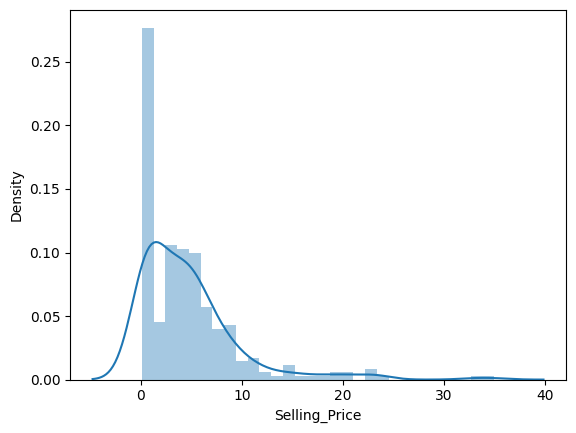

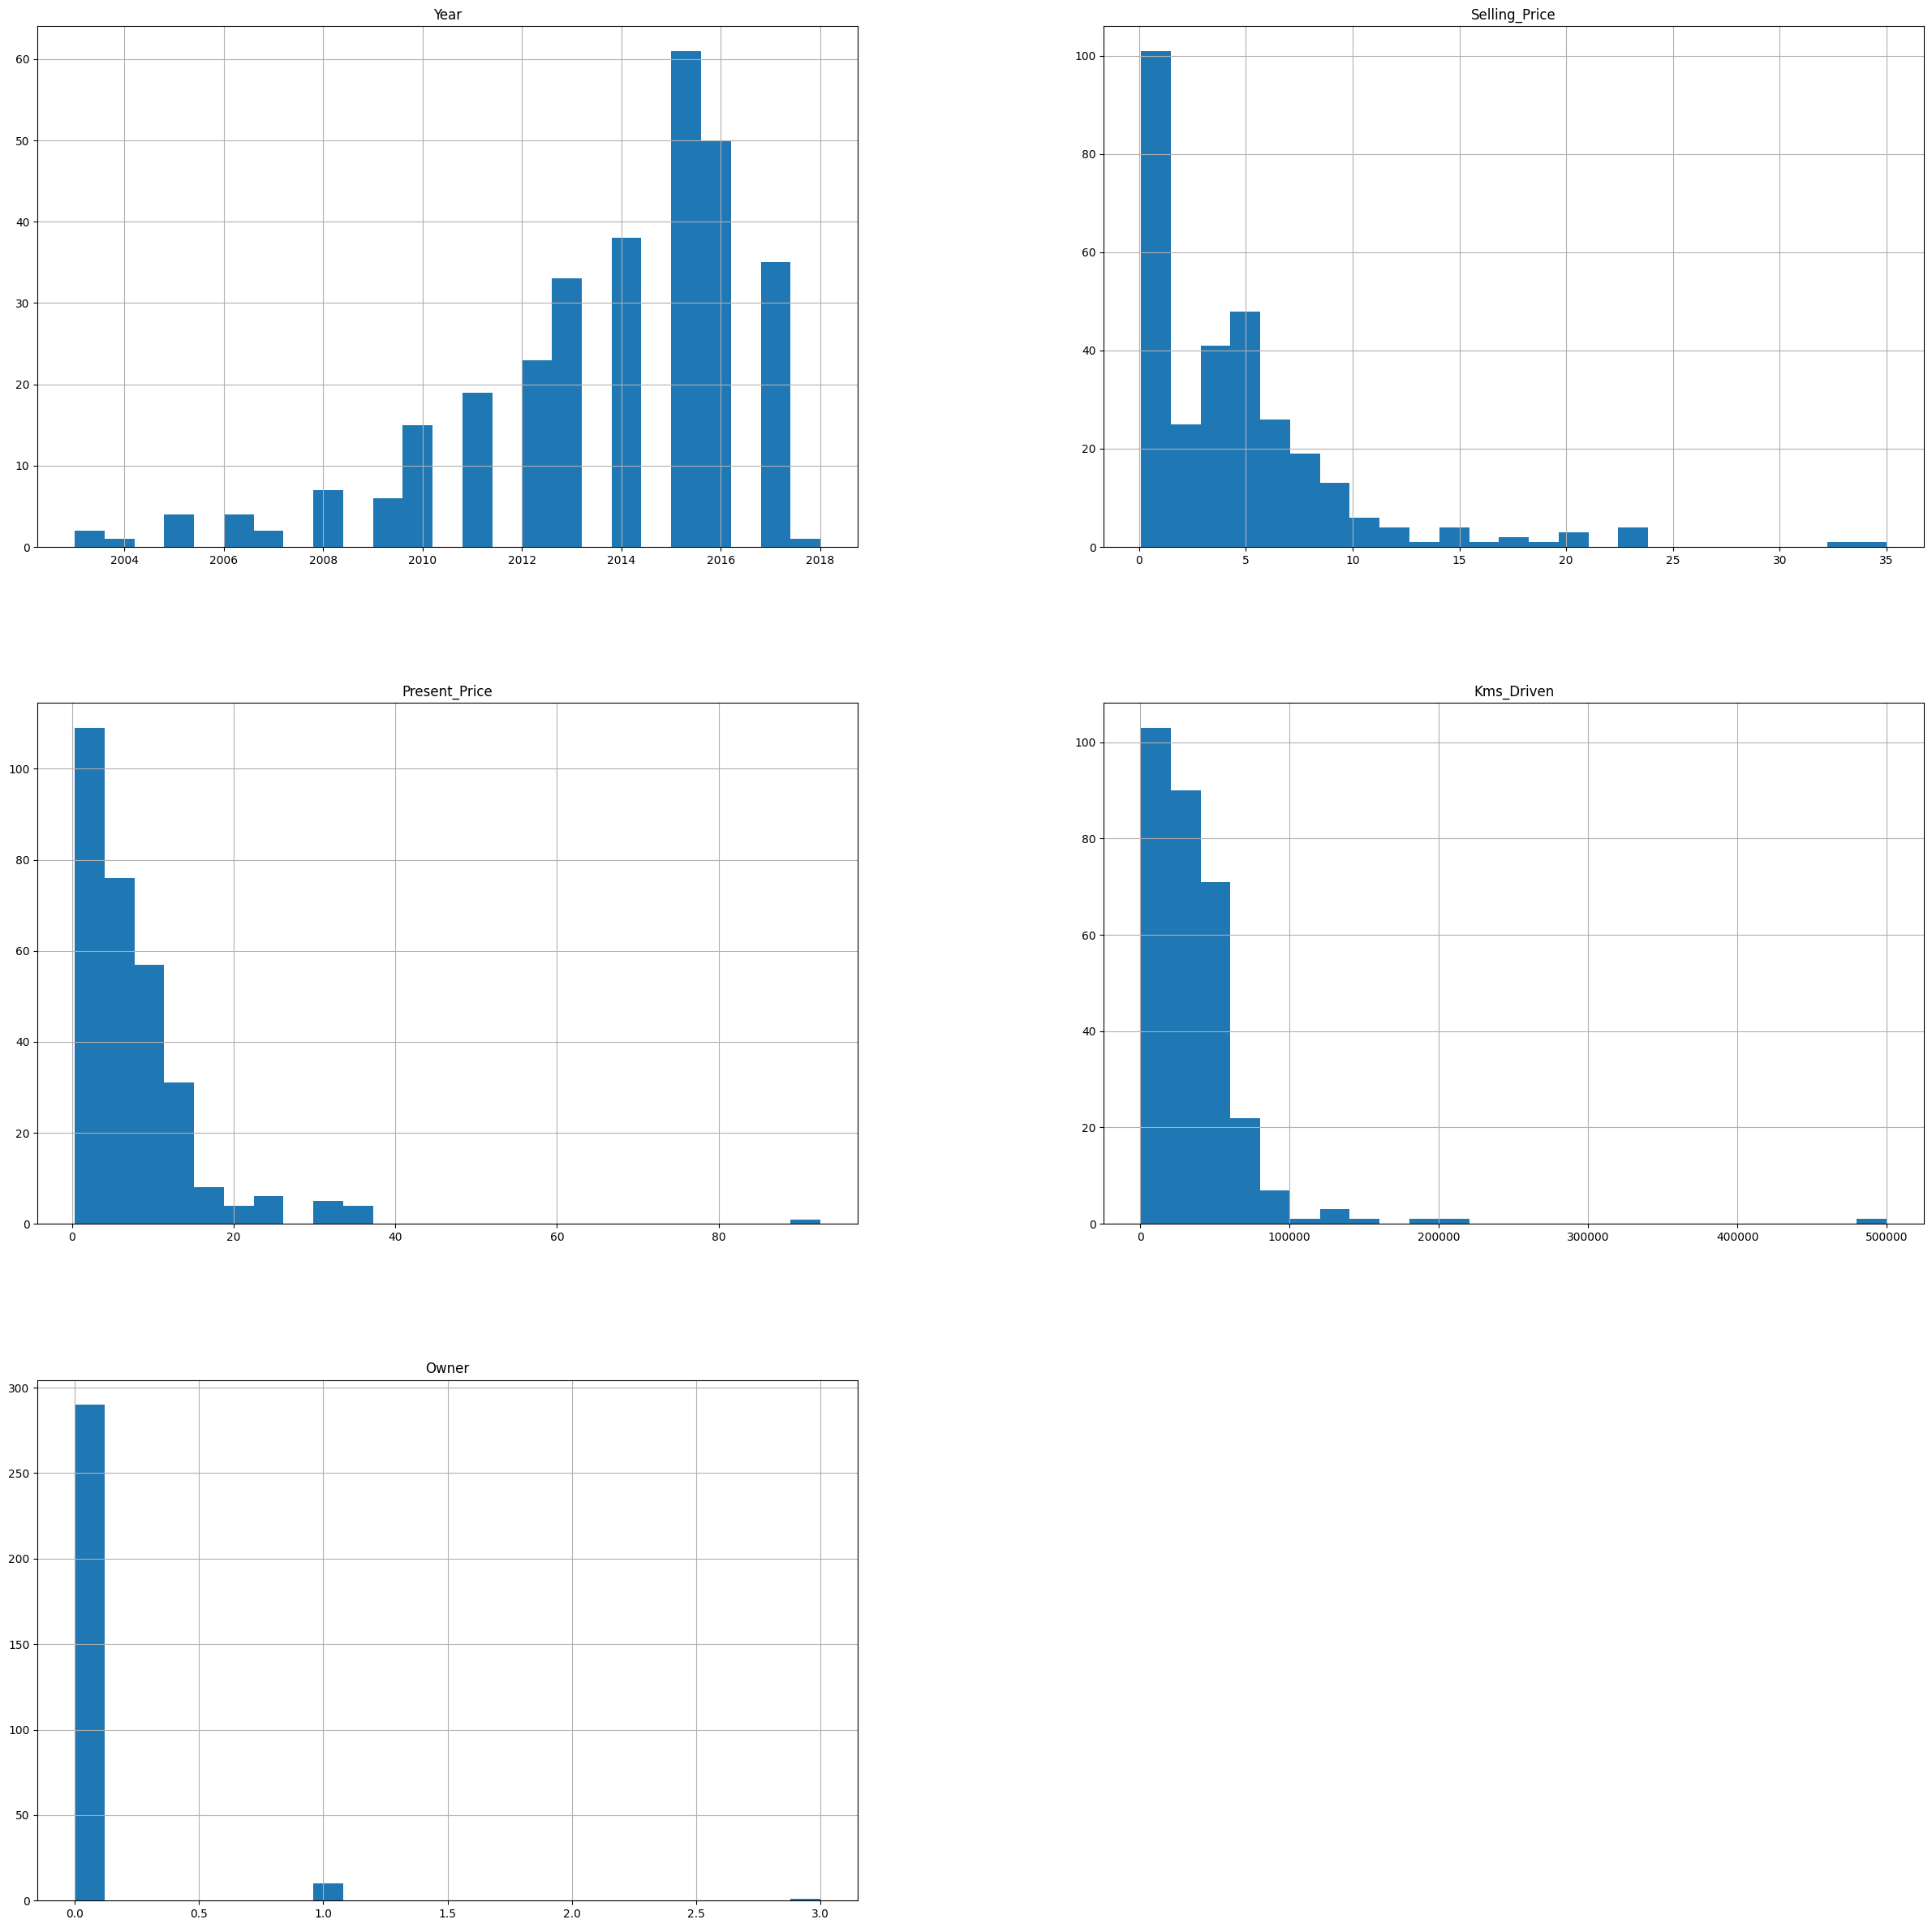

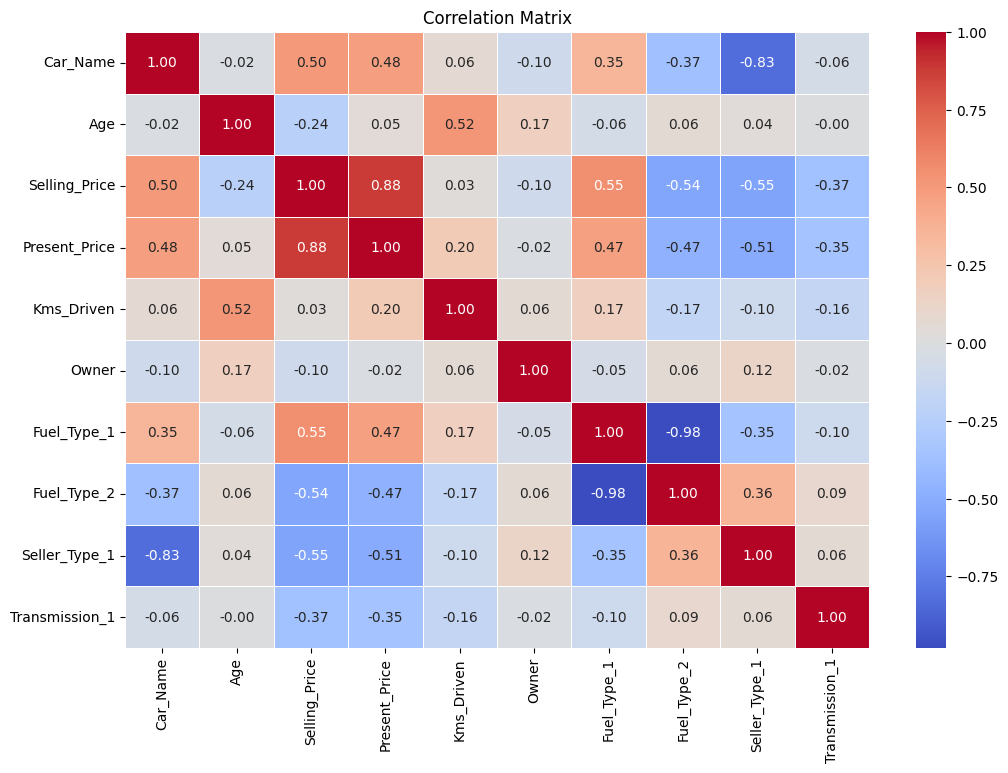

   Car_Name  Age  Selling_Price  Present_Price  Kms_Driven  Owner  \
0        90   10           3.35           5.59       27000      0   
1        93   11           4.75           9.54       43000      0   
2        68    7           7.25           9.85        6900      0   
3        96   13           2.85           4.15        5200      0   
4        92   10           4.60           6.87       42450      0   

   Fuel_Type_1  Fuel_Type_2  Seller_Type_1  Transmission_1  
0            0            1              0               1  
1            1            0              0               1  
2            0            1              0               1  
3            0            1              0               1  
4            1            0              0               1  


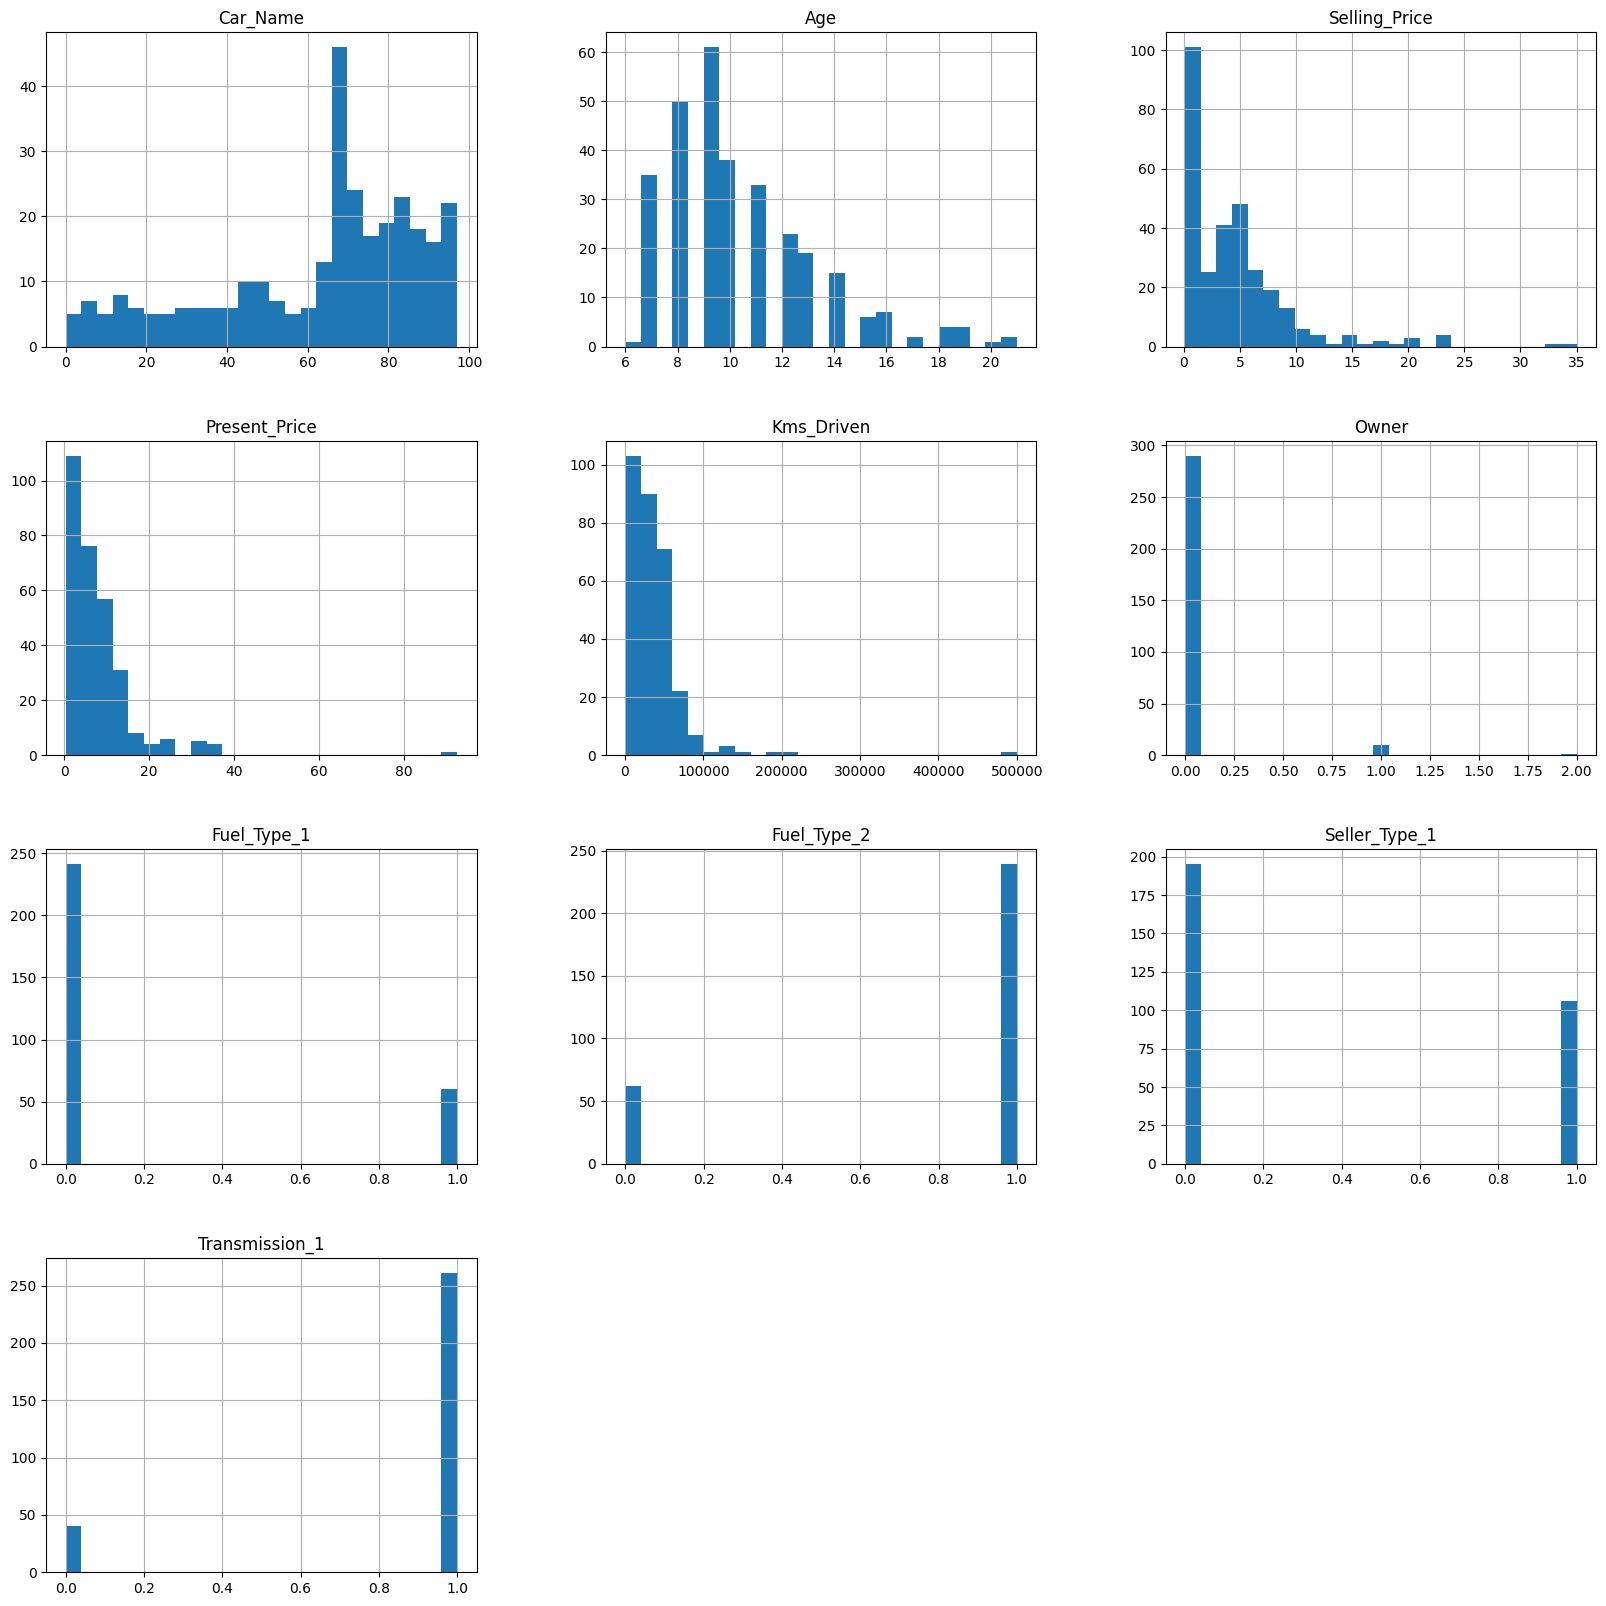

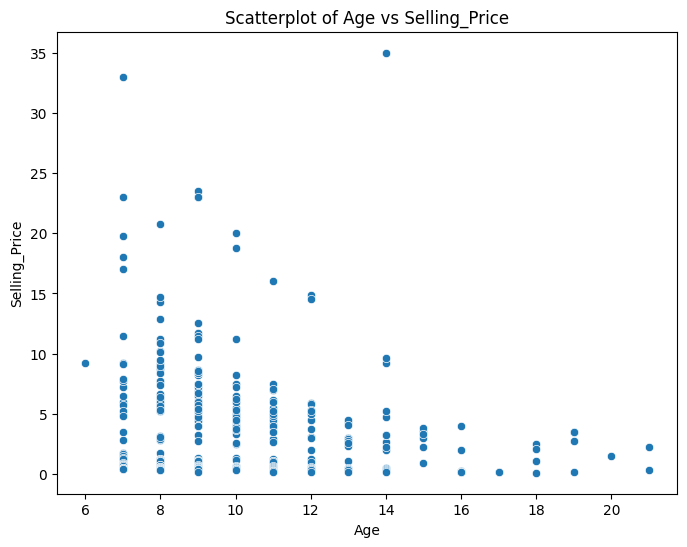

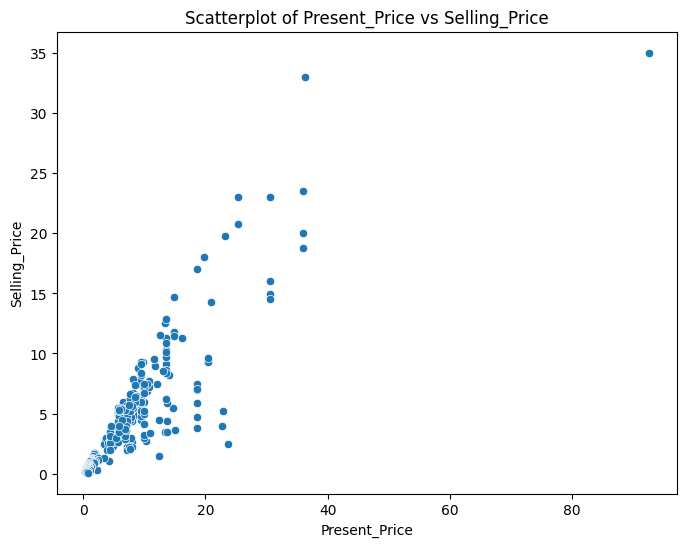

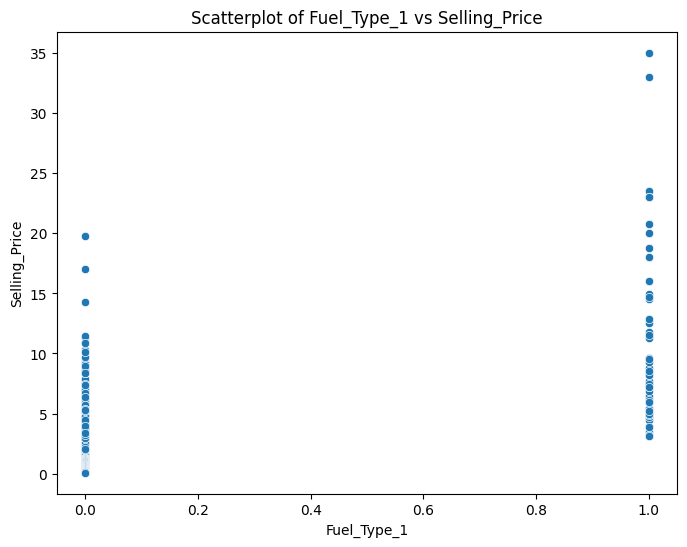

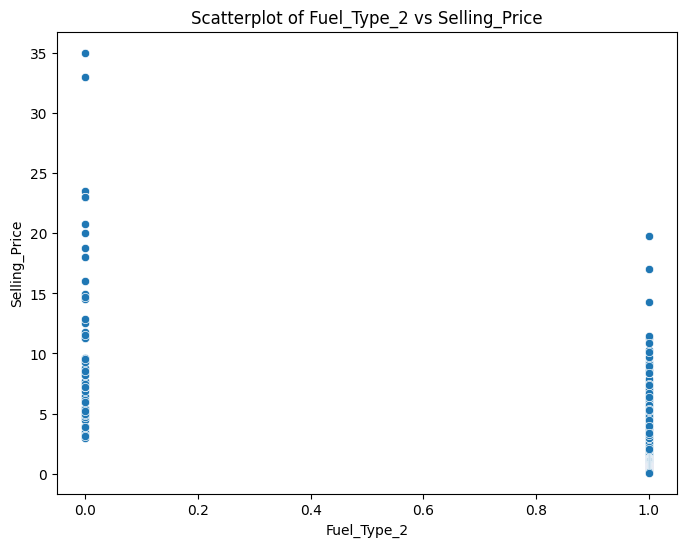

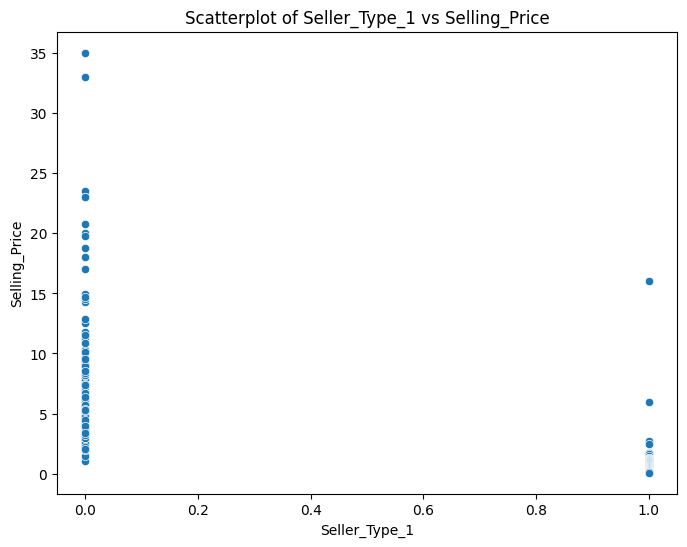

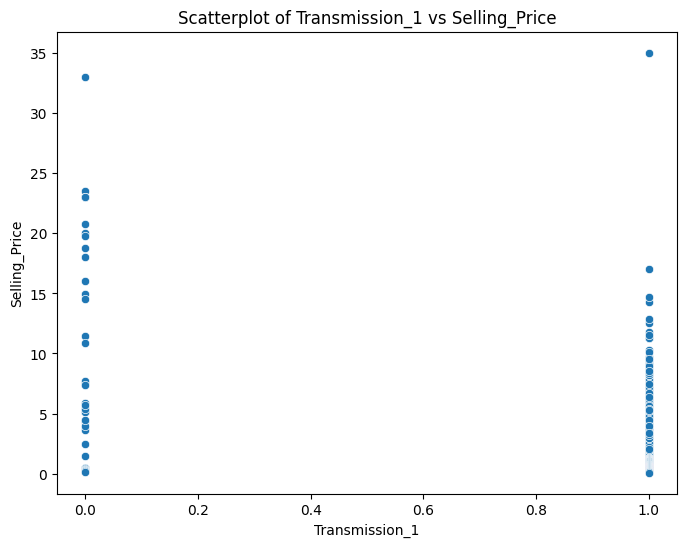

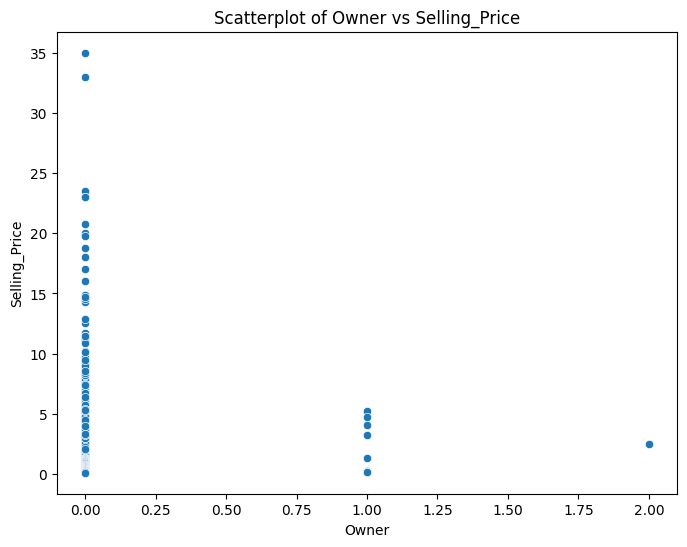

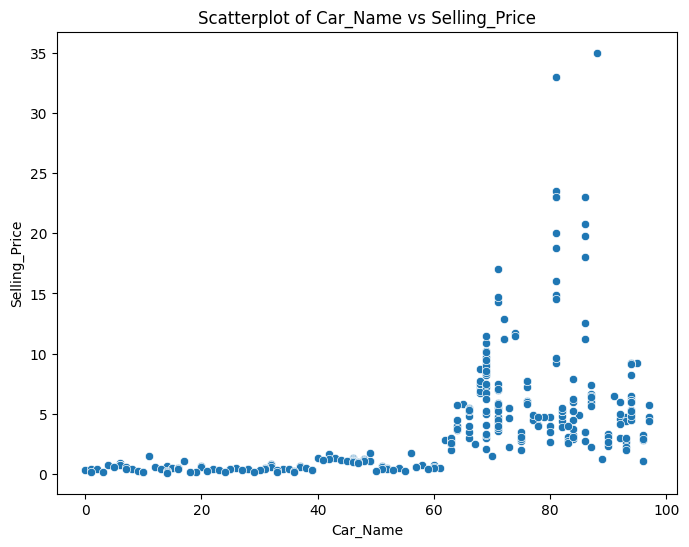

(225, 8)
(76, 8)
(225, 1)
(76, 1)
X_train_scaled shape: (225, 8)
X_test_scaled shape: (76, 8)
y_train shape: (225, 1)
y_test shape: (76, 1)
                                 OLS Regression Results                                
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.476
Model:                            OLS   Adj. R-squared (uncentered):              0.456
Method:                 Least Squares   F-statistic:                              24.60
Date:                Sat, 03 Feb 2024   Prob (F-statistic):                    9.67e-27
Time:                        19:50:35   Log-Likelihood:                         -687.92
No. Observations:                 225   AIC:                                      1392.
Df Residuals:                     217   BIC:                                      1419.
Df Model:                           8                                                  
Covariance Type:            nonrobust                               

<ipython-input-6-412dd86c494d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


X_train_pca shape: (225, 1)
X_test_pca shape: (76, 1)
                                 OLS Regression Results                                
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.321
Model:                            OLS   Adj. R-squared (uncentered):              0.318
Method:                 Least Squares   F-statistic:                              106.0
Date:                Sat, 03 Feb 2024   Prob (F-statistic):                    1.31e-20
Time:                        19:50:36   Log-Likelihood:                         -716.93
No. Observations:                 225   AIC:                                      1436.
Df Residuals:                     224   BIC:                                      1439.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025

<ipython-input-6-412dd86c494d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


X_train_pca shape: (225, 2)
X_test_pca shape: (76, 2)
                                 OLS Regression Results                                
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.323
Model:                            OLS   Adj. R-squared (uncentered):              0.317
Method:                 Least Squares   F-statistic:                              53.24
Date:                Sat, 03 Feb 2024   Prob (F-statistic):                    1.26e-19
Time:                        19:50:37   Log-Likelihood:                         -716.62
No. Observations:                 225   AIC:                                      1437.
Df Residuals:                     223   BIC:                                      1444.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025

<ipython-input-6-412dd86c494d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


X_train_pca shape: (225, 3)
X_test_pca shape: (76, 3)
                                 OLS Regression Results                                
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.323
Model:                            OLS   Adj. R-squared (uncentered):              0.314
Method:                 Least Squares   F-statistic:                              35.38
Date:                Sat, 03 Feb 2024   Prob (F-statistic):                    9.92e-19
Time:                        19:50:38   Log-Likelihood:                         -716.56
No. Observations:                 225   AIC:                                      1439.
Df Residuals:                     222   BIC:                                      1449.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025

<ipython-input-6-412dd86c494d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


X_train_pca shape: (225, 4)
X_test_pca shape: (76, 4)
                                 OLS Regression Results                                
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.390
Model:                            OLS   Adj. R-squared (uncentered):              0.379
Method:                 Least Squares   F-statistic:                              35.31
Date:                Sat, 03 Feb 2024   Prob (F-statistic):                    8.48e-23
Time:                        19:50:39   Log-Likelihood:                         -704.93
No. Observations:                 225   AIC:                                      1418.
Df Residuals:                     221   BIC:                                      1432.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025

<ipython-input-6-412dd86c494d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


X_train_pca shape: (225, 5)
X_test_pca shape: (76, 5)
                                 OLS Regression Results                                
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.395
Model:                            OLS   Adj. R-squared (uncentered):              0.381
Method:                 Least Squares   F-statistic:                              28.69
Date:                Sat, 03 Feb 2024   Prob (F-statistic):                    2.32e-22
Time:                        19:50:42   Log-Likelihood:                         -704.05
No. Observations:                 225   AIC:                                      1418.
Df Residuals:                     220   BIC:                                      1435.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025

<ipython-input-6-412dd86c494d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


X_train_pca shape: (225, 6)
X_test_pca shape: (76, 6)
                                 OLS Regression Results                                
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.475
Model:                            OLS   Adj. R-squared (uncentered):              0.461
Method:                 Least Squares   F-statistic:                              33.04
Date:                Sat, 03 Feb 2024   Prob (F-statistic):                    3.14e-28
Time:                        19:50:43   Log-Likelihood:                         -688.01
No. Observations:                 225   AIC:                                      1388.
Df Residuals:                     219   BIC:                                      1409.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025

<ipython-input-6-412dd86c494d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


X_train_pca shape: (225, 7)
X_test_pca shape: (76, 7)
                                 OLS Regression Results                                
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.475
Model:                            OLS   Adj. R-squared (uncentered):              0.458
Method:                 Least Squares   F-statistic:                              28.20
Date:                Sat, 03 Feb 2024   Prob (F-statistic):                    1.88e-27
Time:                        19:50:45   Log-Likelihood:                         -688.00
No. Observations:                 225   AIC:                                      1390.
Df Residuals:                     218   BIC:                                      1414.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025

<ipython-input-6-412dd86c494d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


X_train_pca shape: (225, 8)
X_test_pca shape: (76, 8)
                                 OLS Regression Results                                
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.476
Model:                            OLS   Adj. R-squared (uncentered):              0.456
Method:                 Least Squares   F-statistic:                              24.60
Date:                Sat, 03 Feb 2024   Prob (F-statistic):                    9.67e-27
Time:                        19:50:46   Log-Likelihood:                         -687.92
No. Observations:                 225   AIC:                                      1392.
Df Residuals:                     217   BIC:                                      1419.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025

<ipython-input-6-412dd86c494d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)



Results for Linear Regression:
MAE: [1.1543849517371996, 1.7937175720740626, 1.7706803051419044, 1.7465343755007707, 1.7489778888465106, 1.6961963759892982, 1.1470413705226075, 1.1503261351032779, 1.1543849517372]
MSE: [2.32646367098388, 6.917653237261432, 6.862113482234659, 6.812220581895157, 5.4640872118332755, 5.179370696905576, 2.302692896463214, 2.317040407997394, 2.326463670983882]
R2: [0.8868665627873018, 0.6636019302867691, 0.6663027691034237, 0.6687290074231182, 0.7342872896686079, 0.7481327489236707, 0.8880225100992122, 0.8873248059761883, 0.8868665627873017]
EVS: [0.8868805857936054, 0.6640243755422532, 0.6663466575517486, 0.6687402508277576, 0.7346304258984067, 0.7481545892925809, 0.8880346624914411, 0.8873551064719568, 0.8868805857936053]

Results for Random Forest:
MAE: [0.38187941165413475, 1.2538362556390978, 0.9438706723057654, 0.7195026142439446, 0.6386656478696746, 0.7205260037593988, 0.6065580320688085, 0.574989337092732, 0.5997628264411027]
MSE: [0.285723161430711

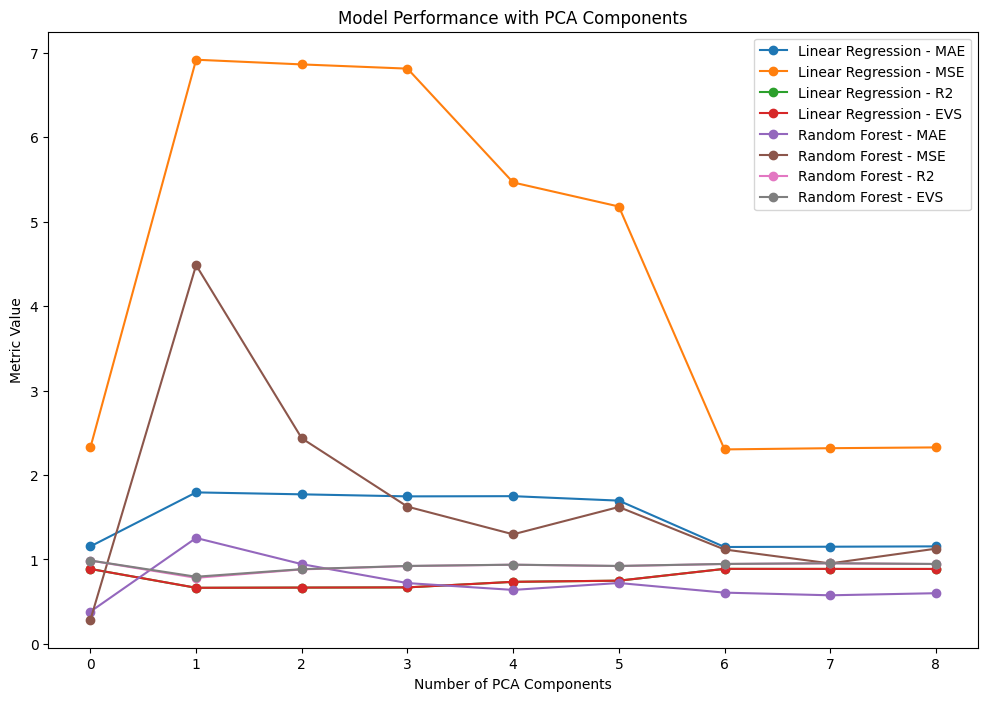

In [8]:
data = pd.read_csv("car_data.csv")
print(data.shape)

X, y=preprocess_data(data)

X_train_scaled, X_test_scaled, y_train, y_test=split_and_scale(X,y)


results_dict = {'Linear Regression': {'MAE': [], 'MSE': [], 'R2': [], 'EVS': []},
                'Random Forest': {'MAE': [], 'MSE': [], 'R2': [], 'EVS': []}}
# store results without pca
apply_linear_regression_with_sm(X_train_scaled, y_train)
mae_lr, mse_lr, r2_lr, evs_lr = apply_linear_regression_with_sklearn(X_train_scaled, y_train, X_test_scaled, y_test)
results_dict['Linear Regression']['MAE'].append(mae_lr)
results_dict['Linear Regression']['MSE'].append(mse_lr)
results_dict['Linear Regression']['R2'].append(r2_lr)
results_dict['Linear Regression']['EVS'].append(evs_lr)

mae_rf, mse_rf, r2_rf, evs_rf = apply_linear_regression_with_RandomForestRegressor(X_train_scaled, y_train, X_test_scaled, y_test)
results_dict['Random Forest']['MAE'].append(mae_rf)
results_dict['Random Forest']['MSE'].append(mse_rf)
results_dict['Random Forest']['R2'].append(r2_rf)
results_dict['Random Forest']['EVS'].append(evs_rf)




for i in range(1, 9):  # components from 1 to 8
    X_train_pca, X_test_pca = apply_pca(X_train_scaled, X_test_scaled, n_components=i)

    #apply linear regression with sm
    apply_linear_regression_with_sm(X_train_pca, y_train)

    #apply linear regression with sklearn
    mae_lr, mse_lr, r2_lr, evs_lr =apply_linear_regression_with_sklearn(X_train_pca, y_train, X_test_pca, y_test)
    results_dict['Linear Regression']['MAE'].append(mae_lr)
    results_dict['Linear Regression']['MSE'].append(mse_lr)
    results_dict['Linear Regression']['R2'].append(r2_lr)
    results_dict['Linear Regression']['EVS'].append(evs_lr)

    #apply linear regression with random_forest
    mae_rf, mse_rf, r2_rf, evs_rf=apply_linear_regression_with_RandomForestRegressor(X_train_pca, y_train, X_test_pca, y_test)
    results_dict['Random Forest']['MAE'].append(mae_rf)
    results_dict['Random Forest']['MSE'].append(mse_rf)
    results_dict['Random Forest']['R2'].append(r2_rf)
    results_dict['Random Forest']['EVS'].append(evs_rf)

# Print or analyze the results
for model, metrics_dict in results_dict.items():
    print(f"\nResults for {model}:")
    for metric, values in metrics_dict.items():
        print(f"{metric}: {values}")

# Visualize the results
components_range = range(0, 9)
plt.figure(figsize=(12, 8))

for model, metrics_dict in results_dict.items():
    for metric, values in metrics_dict.items():
        plt.plot(components_range, [values[0]] + values[1:], marker='o', label=f"{model} - {metric}")

plt.title("Model Performance with PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Metric Value")
plt.legend()
plt.show()






# cross validation function

In [9]:


def cross_validate_model(model, X, y, cv=5, scoring='neg_mean_absolute_error'):
    y_flattened = np.ravel(y)  # Flatten the y array
    scores = cross_val_score(model, X, y_flattened, cv=cv, scoring=scoring)
    return -scores  # Convert to positive




#Cross validate through different pca components and without pca components and show the results

In [10]:
# Cross-validate for different numbers of PCA components
for i in range(1, 9):
    X_train_pca, _ = apply_pca(X_train_scaled, X_test_scaled, n_components=i)


    # Cross-validate linear regression with PCA
    cross_val_lr_pca = cross_validate_model(LinearRegression(), X_train_pca, y_train)
    print(f"Cross-validated MAE for Linear Regression with PCA ({i} components): {cross_val_lr_pca.mean()}")

    # Cross-validate random forest regression with PCA
    cross_val_rf_pca = cross_validate_model(RandomForestRegressor(n_estimators=250), X_train_pca, y_train)
    print(f"Cross-validated MAE for Random Forest with PCA ({i} components): {cross_val_rf_pca.mean()}")


# Initialize results dictionary
results_dict = {'Model': [], 'MAE': []}

# Cross-validate linear regression
cross_val_lr = cross_validate_model(LinearRegression(), X_train_scaled, y_train)
results_dict['Model'].append('Linear Regression')
results_dict['MAE'].append(cross_val_lr.mean())

# Cross-validate random forest regression
cross_val_rf = cross_validate_model(RandomForestRegressor(n_estimators=250), X_train_scaled, y_train)
results_dict['Model'].append('Random Forest')
results_dict['MAE'].append(cross_val_rf.mean())

# Cross-validate for different numbers of PCA components
for i in range(1, 9):
    X_train_pca, _ = apply_pca(X_train_scaled, X_test_scaled, n_components=i)

    # Cross-validate linear regression with PCA
    cross_val_lr_pca = cross_validate_model(LinearRegression(), X_train_pca, y_train)
    results_dict['Model'].append(f'Linear Regression (PCA={i})')
    results_dict['MAE'].append(cross_val_lr_pca.mean())

    # Cross-validate random forest regression with PCA
    cross_val_rf_pca = cross_validate_model(RandomForestRegressor(n_estimators=250), X_train_pca, y_train)
    results_dict['Model'].append(f'Random Forest (PCA={i})')
    results_dict['MAE'].append(cross_val_rf_pca.mean())

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results_dict)

# Print the DataFrame
print(results_df)

X_train_pca shape: (225, 1)
X_test_pca shape: (76, 1)
Cross-validated MAE for Linear Regression with PCA (1 components): 2.1236843211875653
Cross-validated MAE for Random Forest with PCA (1 components): 1.7092491376366845
X_train_pca shape: (225, 2)
X_test_pca shape: (76, 2)
Cross-validated MAE for Linear Regression with PCA (2 components): 2.18839076562583
Cross-validated MAE for Random Forest with PCA (2 components): 1.4398768586243398
X_train_pca shape: (225, 3)
X_test_pca shape: (76, 3)
Cross-validated MAE for Linear Regression with PCA (3 components): 2.1832584570659437
Cross-validated MAE for Random Forest with PCA (3 components): 1.2790831326984133
X_train_pca shape: (225, 4)
X_test_pca shape: (76, 4)
Cross-validated MAE for Linear Regression with PCA (4 components): 1.9307130189362482
Cross-validated MAE for Random Forest with PCA (4 components): 1.0562043081481487
X_train_pca shape: (225, 5)
X_test_pca shape: (76, 5)
Cross-validated MAE for Linear Regression with PCA (5 compon